In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import numpy as np
import cv2

# Import matplotlib libraries
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

# Some modules to display an animation using imageio.
import imageio
from IPython.display import HTML, display

import mediapipe as mp
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense
import pandas as pd
import numpy as np

import math

In [3]:
dataset = pd.read_csv("C:\\Users\\Crim\\Desktop\\RESEARCH_THESIS\\golfpose\\human-pose-estimation-opencv\\GolfMediaPipeData.csv")
dataset.head()

,x1,x2,x3,x4,x5,x6,x7,x8,Label
0,173.382680,162.905673,1.682428,1.951471,157.318779,176.730082,176.730082,178.661229,1
1,165.253038,156.930396,7.233925,1.591685,153.671720,173.217956,173.217956,177.346512,1
2,161.581891,162.968698,3.535050,1.496108,169.982488,170.023857,170.023857,179.863322,1
3,169.232114,162.796697,0.613883,0.804719,173.916213,176.045937,176.045937,177.358669,1
4,173.758449,175.173183,3.802594,0.828725,162.272318,174.503925,174.503925,171.857373,1


In [4]:
# Load the dataset
dfMP = pd.read_csv('GolfMediaPipeData.csv' )
dfM = pd.read_csv('GolfMovenetData.csv')
dfOP = pd.read_csv('GolfOpenPoseData.csv')

X = dfMP[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
X = X.values
y = dfMP[['Label']]
y = y.values

X1 = dfM[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
X1 = X1.values
y1 = dfM[['Label']]
y1 = y1.values

X2 = dfOP[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
X2 = X2.values
y2 = dfOP[['Label']]
y2 = y2.values




In [5]:
#Mediapipe Linear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# initialize a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(X)

# initialize an SVM model with linear kernel
clf = SVC(kernel='linear', C=1, probability=True)

# fit the model to the scaled data
clf.fit(X_scaled, y)

# make predictions on the scaled data
y_pred = clf.predict(X_scaled)

print(y_pred)
accuracy = accuracy_score(y, y_pred)
print("Mediapipe Accuracy:", accuracy)

#Movenet Linear
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2)
# initialize a StandardScaler object
scaler1 = StandardScaler()

# fit the scaler to the data and transform it
X_scaled1 = scaler1.fit_transform(X1)

# initialize an SVM model with linear kernel
clf1 = SVC(kernel='linear', C=1, probability=True)

# fit the model to the scaled data
clf1.fit(X_scaled1, y1)

# make predictions on the scaled data
y_pred1 = clf1.predict(X_scaled1)

print(y_pred1)
accuracy1 = accuracy_score(y1, y_pred1)
print("Movenet Accuracy:", accuracy1)

#OpenPose Linear
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)
# initialize a StandardScaler object
scaler2 = StandardScaler()

# fit the scaler to the data and transform it
X_scaled2 = scaler2.fit_transform(X2)

# initialize an SVM model with linear kernel
clf2 = SVC(kernel='linear', C=1, probability=True)

# fit the model to the scaled data
clf2.fit(X_scaled2, y2)

# make predictions on the scaled data
y_pred2 = clf2.predict(X_scaled2)

print(y_pred2)
accuracy2 = accuracy_score(y2, y_pred2)
print("OpenPose Accuracy:", accuracy2)

c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 1 ... 2 5 5]
Mediapipe Accuracy: 0.8026905829596412


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 1 ... 5 5 3]
Movenet Accuracy: 0.7364444444444445


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 1 ... 1 3 5]
OpenPose Accuracy: 0.56


In [49]:
#Mediapipe Polynomial
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# initialize a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(X)

# initialize an SVM model with linear kernel
clf = SVC(kernel='poly', degree=3, C=1, probability=True)

# fit the model to the scaled data
clf.fit(X_scaled, y)

# make predictions on the scaled data
y_pred = clf.predict(X_scaled)

print(y_pred)
accuracy = accuracy_score(y, y_pred)
print("Mediapipe Accuracy:", accuracy)

#Movenet Polynomial
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2)
# initialize a StandardScaler object
scaler1 = StandardScaler()

# fit the scaler to the data and transform it
X_scaled1 = scaler1.fit_transform(X1)

# initialize an SVM model with linear kernel
clf1 = SVC(kernel='poly', degree=3, C=1, probability=True)

# fit the model to the scaled data
clf1.fit(X_scaled1, y1)

# make predictions on the scaled data
y_pred1 = clf1.predict(X_scaled1)

print(y_pred1)
accuracy1 = accuracy_score(y1, y_pred1)
print("Movenet Accuracy:", accuracy1)

#OpenPose Polynomial
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)
# initialize a StandardScaler object
scaler2 = StandardScaler()

# fit the scaler to the data and transform it
X_scaled2 = scaler2.fit_transform(X2)

# initialize an SVM model with linear kernel
clf2 = SVC(kernel='poly', degree=3, C=1, probability=True)

# fit the model to the scaled data
clf2.fit(X_scaled2, y2)

# make predictions on the scaled data
y_pred2 = clf2.predict(X_scaled2)

print(y_pred2)
accuracy2 = accuracy_score(y2, y_pred2)
print("OpenPose Accuracy:", accuracy2)

c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 1 ... 2 5 5]
Mediapipe Accuracy: 0.8318385650224215


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 1 ... 5 5 5]
Movenet Accuracy: 0.8222222222222222


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 1 ... 1 5 5]
OpenPose Accuracy: 0.6231111111111111


In [23]:
#Mediapipe RBF
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# initialize a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(X)

# initialize an SVM model with linear kernel
clf = SVC(kernel='rbf', gamma=0.1, C=1, probability=True)

# fit the model to the scaled data
clf.fit(X_scaled, y)

# make predictions on the scaled data
y_pred = clf.predict(X_scaled)

print(y_pred)
accuracy = accuracy_score(y, y_pred)
print("Mediapipe Accuracy:", accuracy)

#Movenet RBF
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2)
# initialize a StandardScaler object
scaler1 = StandardScaler()

# fit the scaler to the data and transform it
X_scaled1 = scaler1.fit_transform(X1)

# initialize an SVM model with linear kernel
clf1 = SVC(kernel='rbf', gamma=0.1, C=1, probability=True)

# fit the model to the scaled data
clf1.fit(X_scaled1, y1)

# make predictions on the scaled data
y_pred1 = clf1.predict(X_scaled1)

print(y_pred1)
accuracy1 = accuracy_score(y1, y_pred1)
print("Movenet Accuracy:", accuracy1)

#OpenPose RBF
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)
# initialize a StandardScaler object
scaler2 = StandardScaler()

# fit the scaler to the data and transform it
X_scaled2 = scaler2.fit_transform(X2)

# initialize an SVM model with linear kernel
clf2 = SVC(kernel='rbf', gamma=0.1, C=1, probability=True)

# fit the model to the scaled data
clf2.fit(X_scaled2, y2)

# make predictions on the scaled data
y_pred2 = clf2.predict(X_scaled2)

print(y_pred2)
accuracy2 = accuracy_score(y2, y_pred2)
print("OpenPose Accuracy:", accuracy2)

c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 1 ... 2 5 5]
Mediapipe Accuracy: 0.8542600896860987


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 1 ... 5 5 5]
Movenet Accuracy: 0.8284444444444444


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 1 ... 1 5 5]
OpenPose Accuracy: 0.6666666666666666


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 1 ... 1 5 5]
OpenPose Accuracy: 0.6666666666666666


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversio

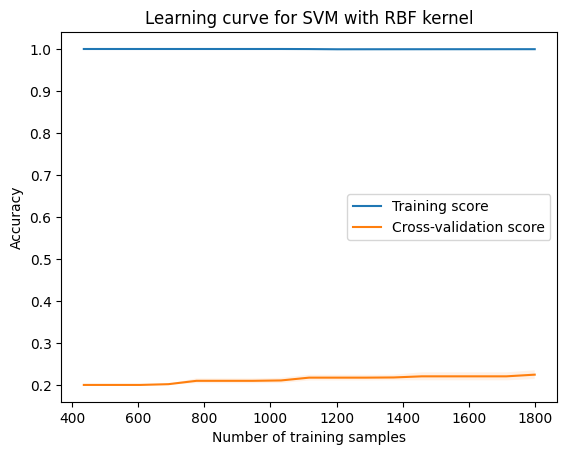

In [54]:
#OpenPose RBF
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)
# initialize a StandardScaler object
scaler2 = StandardScaler()

# fit the scaler to the data and transform it
X_scaled2 = scaler2.fit_transform(X2)

# initialize an SVM model with linear kernel
clf2 = SVC(kernel='rbf', gamma=0.1, C=1, probability=True)

# fit the model to the scaled data
clf2.fit(X_scaled2, y2)

# make predictions on the scaled data
y_pred2 = clf2.predict(X_scaled2)

print(y_pred2)
accuracy2 = accuracy_score(y2, y_pred2)
print("OpenPose Accuracy:", accuracy2)

train_sizes = np.linspace(0.1, 1.0, 20)
train_sizes, train_scores, test_scores = learning_curve(
    clf2, X2, y2, train_sizes=train_sizes, cv=5)

# calculate the mean and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.legend(loc='best')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning curve for SVM with RBF kernel')
plt.show()

In [22]:
#Mediapipe sigmoid
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# initialize a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(X)

# initialize an SVM model with linear kernel
clf = SVC(kernel='sigmoid', C=1, probability=True)

# fit the model to the scaled data
clf.fit(X_scaled, y)

# make predictions on the scaled data
y_pred = clf.predict(X_scaled)

print(y_pred)
accuracy = accuracy_score(y, y_pred)
print("Mediapipe Accuracy:", accuracy)

#Movenet sigmoid
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2)
# initialize a StandardScaler object
scaler1 = StandardScaler()

# fit the scaler to the data and transform it
X_scaled1 = scaler1.fit_transform(X1)

# initialize an SVM model with linear kernel
clf1 = SVC(kernel='sigmoid', C=1, probability=True)

# fit the model to the scaled data
clf1.fit(X_scaled1, y1)

# make predictions on the scaled data
y_pred1 = clf1.predict(X_scaled1)

print(y_pred1)
accuracy1 = accuracy_score(y1, y_pred1)
print("Movenet Accuracy:", accuracy1)

#OpenPose sigmoid
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)
# initialize a StandardScaler object
scaler2 = StandardScaler()

# fit the scaler to the data and transform it
X_scaled2 = scaler2.fit_transform(X2)

# initialize an SVM model with linear kernel
clf2 = SVC(kernel='sigmoid', C=1, probability=True)
# fit the model to the scaled data
clf2.fit(X_scaled2, y2)

# make predictions on the scaled data
y_pred2 = clf2.predict(X_scaled2)

print(y_pred2)
accuracy2 = accuracy_score(y2, y_pred2)
print("OpenPose Accuracy:", accuracy2)

c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 1 ... 5 5 3]
Mediapipe Accuracy: 0.6654708520179372


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 1 ... 1 1 3]
Movenet Accuracy: 0.5804444444444444


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 3 ... 1 3 2]
OpenPose Accuracy: 0.3968888888888889


In [6]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_pose = mp.solutions.pose
mp_drawing_styles = mp.solutions.drawing_styles
pose = mp_pose.Pose()


def calculate_angles(firstPoint, midPoint, lastPoint):
  # Same formula from the Android App for consistency
  result = math.degrees(math.atan2(lastPoint.y  - midPoint.y, lastPoint.x - midPoint.x) - math.atan2(firstPoint.y - midPoint.y, firstPoint.x - midPoint.x))
  result = abs(result) # Angle should never be negative
  # 
  if result > 180:
      result = 360.0 - result # Always get the acute representation of the angle
  return result

def extract_angles_test(results):
  if results.pose_landmarks is None:
      return None
  
  # Calculates the essential angles for each image and adds them to the array
  left_elbow_angles = calculate_angles(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST] , results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW], results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER])
  right_elbow_angles = calculate_angles(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST], results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW], results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER])
  left_shoulder_angles = calculate_angles(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW], results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER], results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP])
  right_shoulder_angles = calculate_angles(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW], results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER], results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP])
  left_hip_angles = calculate_angles(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER], results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP], results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE])
  right_hip_angles = calculate_angles(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER], results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP], results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE])
  left_knee_angles = calculate_angles(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP], results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE], results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL])
  right_knee_angles = calculate_angles(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP], results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE], results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL])

  return [[left_elbow_angles, right_elbow_angles, left_shoulder_angles, right_shoulder_angles, left_hip_angles, right_hip_angles, left_knee_angles, right_knee_angles]]

In [7]:
#@title Helper functions for visualization
left_shoulder = []
right_shoulder = []
left_elbow = []
right_elbow = []
left_wrist = []
right_wrist = []
left_hip = []
right_hip = []
left_knee = []
right_knee = []
left_ankle = []
right_ankle = []

def calculate_angles_movenet(firstPoint, midPoint, lastPoint):
  # Same formula from the Android App for consistency
  result = math.degrees(math.atan2(lastPoint[1]  - midPoint[1], lastPoint[0] - midPoint[0]) - math.atan2(firstPoint[1] - midPoint[1], firstPoint[0] - midPoint[0]))
  result = abs(result) # Angle should never be negative
  # 
  if result > 180:
      result = 360.0 - result # Always get the acute representation of the angle
  return result

# Dictionary that maps from joint names to keypoint indices.
KEYPOINT_DICT = {
    'nose': 0,
    'left_eye': 1,
    'right_eye': 2,
    'left_ear': 3,
    'right_ear': 4,
    'left_shoulder': 5,
    'right_shoulder': 6,
    'left_elbow': 7,
    'right_elbow': 8,
    'left_wrist': 9,
    'right_wrist': 10,
    'left_hip': 11,
    'right_hip': 12,
    'left_knee': 13,
    'right_knee': 14,
    'left_ankle': 15,
    'right_ankle': 16
}

# Maps bones to a matplotlib color name.
KEYPOINT_EDGE_INDS_TO_COLOR = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

def _keypoints_and_edges_for_display(keypoints_with_scores,
                                     height,
                                     width,
                                     keypoint_threshold=0.11):
  """Returns high confidence keypoints and edges for visualization.

  Args:
    keypoints_with_scores: A numpy array with shape [1, 1, 17, 3] representing
      the keypoint coordinates and scores returned from the MoveNet model.
    height: height of the image in pixels.
    width: width of the image in pixels.
    keypoint_threshold: minimum confidence score for a keypoint to be
      visualized.

  Returns:
    A (keypoints_xy, edges_xy, edge_colors) containing:
      * the coordinates of all keypoints of all detected entities;
      * the coordinates of all skeleton edges of all detected entities;
      * the colors in which the edges should be plotted.
  """
  keypoints_all = []
  keypoint_edges_all = []
  edge_colors = []
  num_instances, _, _, _ = keypoints_with_scores.shape
  for idx in range(num_instances):
    kpts_x = keypoints_with_scores[0, idx, :, 1]
    kpts_y = keypoints_with_scores[0, idx, :, 0]
    kpts_scores = keypoints_with_scores[0, idx, :, 2]
    kpts_absolute_xy = np.stack(
        [width * np.array(kpts_x), height * np.array(kpts_y)], axis=-1)
    kpts_above_thresh_absolute = kpts_absolute_xy[
        kpts_scores > keypoint_threshold, :]
    keypoints_all.append(kpts_above_thresh_absolute)

    for edge_pair, color in KEYPOINT_EDGE_INDS_TO_COLOR.items():
      if (kpts_scores[edge_pair[0]] > keypoint_threshold and
          kpts_scores[edge_pair[1]] > keypoint_threshold):
        x_start = kpts_absolute_xy[edge_pair[0], 0]
        y_start = kpts_absolute_xy[edge_pair[0], 1]
        x_end = kpts_absolute_xy[edge_pair[1], 0]
        y_end = kpts_absolute_xy[edge_pair[1], 1]
        line_seg = np.array([[x_start, y_start], [x_end, y_end]])
        keypoint_edges_all.append(line_seg)
        edge_colors.append(color)
  if keypoints_all:
    keypoints_xy = np.concatenate(keypoints_all, axis=0)
  else:
    keypoints_xy = np.zeros((0, 17, 2))

  if keypoint_edges_all:
    edges_xy = np.stack(keypoint_edges_all, axis=0)
  else:
    edges_xy = np.zeros((0, 2, 2))
  return keypoints_xy, edges_xy, edge_colors


def draw_prediction_on_image(
    image, keypoints_with_scores, crop_region=None, close_figure=False,
    output_image_height=None):
  """Draws the keypoint predictions on image.

  Args:
    image: A numpy array with shape [height, width, channel] representing the
      pixel values of the input image.
    keypoints_with_scores: A numpy array with shape [1, 1, 17, 3] representing
      the keypoint coordinates and scores returned from the MoveNet model.
    crop_region: A dictionary that defines the coordinates of the bounding box
      of the crop region in normalized coordinates (see the init_crop_region
      function below for more detail). If provided, this function will also
      draw the bounding box on the image.
    output_image_height: An integer indicating the height of the output image.
      Note that the image aspect ratio will be the same as the input image.

  Returns:
    A numpy array with shape [out_height, out_width, channel] representing the
    image overlaid with keypoint predictions.
  """
  height, width, channel = image.shape
  aspect_ratio = float(width) / height
  fig, ax = plt.subplots(figsize=(12 * aspect_ratio, 12))
  # To remove the huge white borders
  fig.tight_layout(pad=0)
  ax.margins(0)
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  plt.axis('off')

  im = ax.imshow(image)
  line_segments = LineCollection([], linewidths=(4), linestyle='solid')
  ax.add_collection(line_segments)
  # Turn off tick labels
  scat = ax.scatter([], [], s=60, color='#FF1493', zorder=3)

  (keypoint_locs, keypoint_edges,
   edge_colors) = _keypoints_and_edges_for_display(
       keypoints_with_scores, height, width)

  line_segments.set_segments(keypoint_edges)
  line_segments.set_color(edge_colors)
  if keypoint_edges.shape[0]:
    line_segments.set_segments(keypoint_edges)
    line_segments.set_color(edge_colors)
  if keypoint_locs.shape[0]:
    scat.set_offsets(keypoint_locs)

  if crop_region is not None:
    xmin = max(crop_region['x_min'] * width, 0.0)
    ymin = max(crop_region['y_min'] * height, 0.0)
    rec_width = min(crop_region['x_max'], 0.99) * width - xmin
    rec_height = min(crop_region['y_max'], 0.99) * height - ymin
    rect = patches.Rectangle(
        (xmin,ymin),rec_width,rec_height,
        linewidth=1,edgecolor='b',facecolor='none')
    ax.add_patch(rect)

  fig.canvas.draw()
  image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
  image_from_plot = image_from_plot.reshape(
      fig.canvas.get_width_height()[::-1] + (3,))
  plt.close(fig)
  if output_image_height is not None:
    output_image_width = int(output_image_height / height * width)
    image_from_plot = cv2.resize(
        image_from_plot, dsize=(output_image_width, output_image_height),
         interpolation=cv2.INTER_CUBIC)
  return image_from_plot

def to_gif(images, fps):
  """Converts image sequence (4D numpy array) to gif."""
  imageio.mimsave('./animation.gif', images, fps=fps)
  return embed.embed_file('./animation.gif')

def progress(value, max=100):
  return HTML("""
      <progress
          value='{value}'
          max='{max}',
          style='width: 100%'
      >
          {value}
      </progress>
  """.format(value=value, max=max))

In [8]:
model_name = "movenet_lightning"

if "tflite" in model_name:
  if "movenet_lightning_f16" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/tflite/float16/4?lite-format=tflite
    input_size = 192
  elif "movenet_thunder_f16" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/tflite/float16/4?lite-format=tflite
    input_size = 256
  elif "movenet_lightning_int8" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/tflite/int8/4?lite-format=tflite
    input_size = 192
  elif "movenet_thunder_int8" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/tflite/int8/4?lite-format=tflite
    input_size = 256
  else:
    raise ValueError("Unsupported model name: %s" % model_name)

  # Initialize the TFLite interpreter
  interpreter = tf.lite.Interpreter(model_path="model.tflite")
  interpreter.allocate_tensors()

  def movenet(input_image):
    """Runs detection on an input image.

    Args:
      input_image: A [1, height, width, 3] tensor represents the input image
        pixels. Note that the height/width should already be resized and match the
        expected input resolution of the model before passing into this function.

    Returns:
      A [1, 1, 17, 3] float numpy array representing the predicted keypoint
      coordinates and scores.
    """
    # TF Lite format expects tensor type of uint8.
    input_image = tf.cast(input_image, dtype=tf.uint8)
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    interpreter.set_tensor(input_details[0]['index'], input_image.numpy())
    # Invoke inference.
    interpreter.invoke()
    # Get the model prediction.
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    return keypoints_with_scores

else:
  if "movenet_lightning" in model_name:
    module = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")
    input_size = 192
  elif "movenet_thunder" in model_name:
    module = hub.load("https://tfhub.dev/google/movenet/singlepose/thunder/4")
    input_size = 256
  else:
    raise ValueError("Unsupported model name: %s" % model_name)

  def movenet(input_image):
    """Runs detection on an input image.

    Args:
      input_image: A [1, height, width, 3] tensor represents the input image
        pixels. Note that the height/width should already be resized and match the
        expected input resolution of the model before passing into this function.

    Returns:
      A [1, 1, 17, 3] float numpy array representing the predicted keypoint
      coordinates and scores.
    """
    model = module.signatures['serving_default']

    # SavedModel format expects tensor type of int32.
    input_image = tf.cast(input_image, dtype=tf.int32)
    # Run model inference.
    outputs = model(input_image)
    # Output is a [1, 1, 17, 3] tensor.
    keypoints_with_scores = outputs['output_0'].numpy()
    return keypoints_with_scores
  
  def movenet(input_image, keypoint_indices):
    """Runs detection on an input image and prints the x and y coordinates of
    the keypoints at index keypoint_indices.

    Args:
      input_image: A [1, height, width, 3] tensor represents the input image
        pixels. Note that the height/width should already be resized and match the
        expected input resolution of the model before passing into this function.
      keypoint_indices: A list of integers representing the indices of the keypoints
        to print the x and y coordinates of.

    Returns:
      A [1, 1, 17, 3] float numpy array representing the predicted keypoint
      coordinates and scores.
    """
    model = module.signatures['serving_default']

    # SavedModel format expects tensor type of int32.
    input_image = tf.cast(input_image, dtype=tf.int32)
    # Run model inference.
    outputs = model(input_image)
    # Output is a [1, 1, 17, 3] tensor.
    keypoints_with_scores = outputs['output_0'].numpy()

    for index in keypoint_indices:
        x, y = keypoints_with_scores[0, 0, index, :2]
        if index == 5:
          left_shoulder = [x, y]
        if index == 6:
          right_shoulder = [x, y]
        if index == 7:
          left_elbow = [x, y]
        if index == 8:
          right_elbow = [x, y]
        if index == 9:
          left_wrist = [x, y]
        if index == 10:
          right_wrist = [x, y]
        if index == 11:
          left_hip = [x, y]
        if index == 12:
          right_hip = [x, y]
        if index == 13:
          left_knee = [x, y]
        if index == 14:
          right_knee = [x, y]
        if index == 15:
          left_ankle = [x, y]
        if index == 16:
          right_ankle = [x, y]

        # print(f"Keypoint {index} - x:{x}, y:{y}")

    left_elbow_angles = calculate_angles_movenet(left_wrist, left_elbow, left_shoulder)
    right_elbow_angles = calculate_angles_movenet(right_wrist, right_elbow, right_shoulder)
    left_shoulder_angles = calculate_angles_movenet(left_elbow, left_shoulder, left_hip)
    right_shoulder_angles = calculate_angles_movenet(right_elbow, right_shoulder, right_hip)
    left_hip_angles = calculate_angles_movenet(left_shoulder, left_hip, left_knee)
    right_hip_angles = calculate_angles_movenet(right_shoulder, right_hip, right_knee)
    left_knee_angles = calculate_angles_movenet(left_hip, left_knee, left_ankle)
    right_knee_angles = calculate_angles_movenet(right_hip, right_knee, right_ankle)
  

    # if (left_elbow_angles is None or right_elbow_angles is None or left_shoulder_angles is None or
    #     right_shoulder_angles is None or left_hip_angles is None or right_hip_angles is None or
    #     left_knee_angles is None or right_knee_angles is None):
    #     print("Skipped - some angles are null.")
    # else:
    #   golfdataset = pd.DataFrame([[left_elbow_angles, right_elbow_angles, left_shoulder_angles, right_shoulder_angles, left_hip_angles, right_hip_angles, left_knee_angles, right_knee_angles, 5]], columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', "Label"])
    #   golfdataset.to_csv('GolfMovenetData.csv', mode='a', index=False, header=False)

    return keypoints_with_scores

# left_elbow_angles = calculate
# right_elbow_angles = []
# left_shoulder_angles = []
# right_shoulder_angles = []
# left_hip_angles = []
# right_hip_angles = []
# left_knee_angles = []
# right_knee_angles = []

# L and R Angle:
# *Elbow = Wrist, Elbow, Shoulder
# *Shoulder = Elbow, Shoulder, Hip
# *Hips = Shoulder, Hip, Knee
# *Knee = Hip, Knee, Heel
def extract_angles(input_image, keypoint_indices):
    """Runs detection on an input image and prints the x and y coordinates of
    the keypoints at index keypoint_indices.

    Args:
      input_image: A [1, height, width, 3] tensor represents the input image
        pixels. Note that the height/width should already be resized and match the
        expected input resolution of the model before passing into this function.
      keypoint_indices: A list of integers representing the indices of the keypoints
        to print the x and y coordinates of.

    Returns:
      A [1, 1, 17, 3] float numpy array representing the predicted keypoint
      coordinates and scores.
    """
    model = module.signatures['serving_default']

    # SavedModel format expects tensor type of int32.
    input_image = tf.cast(input_image, dtype=tf.int32)
    # Run model inference.
    outputs = model(input_image)
    # Output is a [1, 1, 17, 3] tensor.
    keypoints_with_scores = outputs['output_0'].numpy()

    for index in keypoint_indices:
        x, y = keypoints_with_scores[0, 0, index, :2]
        if index == 5:
          left_shoulder = [x, y]
        if index == 6:
          right_shoulder = [x, y]
        if index == 7:
          left_elbow = [x, y]
        if index == 8:
          right_elbow = [x, y]
        if index == 9:
          left_wrist = [x, y]
        if index == 10:
          right_wrist = [x, y]
        if index == 11:
          left_hip = [x, y]
        if index == 12:
          right_hip = [x, y]
        if index == 13:
          left_knee = [x, y]
        if index == 14:
          right_knee = [x, y]
        if index == 15:
          left_ankle = [x, y]
        if index == 16:
          right_ankle = [x, y]

        # print(f"Keypoint {index} - x:{x}, y:{y}")

    left_elbow_angles = calculate_angles_movenet(left_wrist, left_elbow, left_shoulder)
    right_elbow_angles = calculate_angles_movenet(right_wrist, right_elbow, right_shoulder)
    left_shoulder_angles = calculate_angles_movenet(left_elbow, left_shoulder, left_hip)
    right_shoulder_angles = calculate_angles_movenet(right_elbow, right_shoulder, right_hip)
    left_hip_angles = calculate_angles_movenet(left_shoulder, left_hip, left_knee)
    right_hip_angles = calculate_angles_movenet(right_shoulder, right_hip, right_knee)
    left_knee_angles = calculate_angles_movenet(left_hip, left_knee, left_ankle)
    right_knee_angles = calculate_angles_movenet(right_hip, right_knee, right_ankle)
  

    if (left_elbow_angles is None or right_elbow_angles is None or left_shoulder_angles is None or
        right_shoulder_angles is None or left_hip_angles is None or right_hip_angles is None or
        left_knee_angles is None or right_knee_angles is None):
        print("Skipped - some angles are null.")

    return [[left_elbow_angles, right_elbow_angles, left_shoulder_angles, right_shoulder_angles, left_hip_angles, right_hip_angles, left_knee_angles, right_knee_angles]]


In [31]:
import numpy as np
from matplotlib import pyplot as plt
import mediapipe as mp
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense
import pandas as pd
import math

BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

width = 368
height = 368
inWidth = width
inHeight = height

net = cv.dnn.readNetFromTensorflow("graph_opt.pb")
thr = 0.2

def poseDetector(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 19 elements

    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
        heatMap = out[0, i, :, :]

        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        points.append((int(x), int(y)) if conf > thr else None)
        

        # relbow_x, relbow_y = points[BODY_PARTS["RElbow"]]
        # lelbow_x, lelbow_y = points[BODY_PARTS["LElbow"]]
        # print(relbow_x)
        # print(relbow_y)
        # print(lelbow_x)
        # print(lelbow_y)


    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()

    return frame

import cv2 as cv
import numpy as np

BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }


#LElbowAngle = 8, 7, 6
#RElbowAngle = 5, 4, 3
#LShoulderAngle = 7, 6, 12
#RShoulderAngle = 4, 3, 9
#LHipsAngle = 6, 12, 13
#RHipsAngle = 3, 9, 10
#LKneeAngle = 12, 13, 14,
#RKneeAngle = 9, 10, 11,


POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

width = 368
height = 368
inWidth = width
inHeight = height

net = cv.dnn.readNetFromTensorflow("graph_opt.pb")
thr = 0.1

def poseFrames(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 19 elements

    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part.
        heatMap = out[0, i, :, :]

        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        points.append((int(x), int(y)))
        
    return points

Predicted label: Mid-Follow-Through, confidence: 100.00%
Predicted label: Mid-Follow-Through, confidence: 100.00%
Predicted label: Mid-Follow-Through, confidence: 99.89%
Predicted label: Mid-Follow-Through, confidence: 100.00%
Predicted label: Mid-Follow-Through, confidence: 100.00%
Predicted label: Mid-Follow-Through, confidence: 99.03%
Predicted label: Mid-Follow-Through, confidence: 97.37%
Predicted label: Impact, confidence: 28.19%
Predicted label: Impact, confidence: 99.89%
Predicted label: Mid-Follow-Through, confidence: 78.29%
Predicted label: Mid-Follow-Through, confidence: 100.00%
Predicted label: Mid-Follow-Through, confidence: 99.85%
Predicted label: Mid-Follow-Through, confidence: 100.00%
Predicted label: Mid-Follow-Through, confidence: 100.00%
Predicted label: Mid-Follow-Through, confidence: 100.00%
Predicted label: Mid-Follow-Through, confidence: 100.00%
Predicted label: Mid-Follow-Through, confidence: 92.74%
Predicted label: Mid-Follow-Through, confidence: 100.00%
Predic

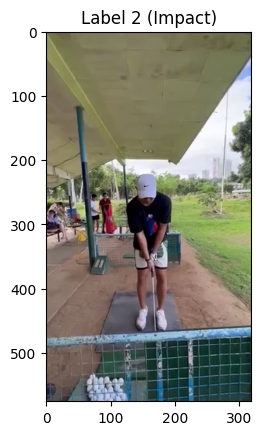

Label 4 (Mid-Downswing) has highest confidence level of 30.14%


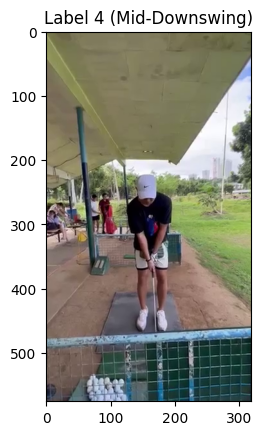

Label 5 (Mid-Follow-Through) has highest confidence level of 100.00%


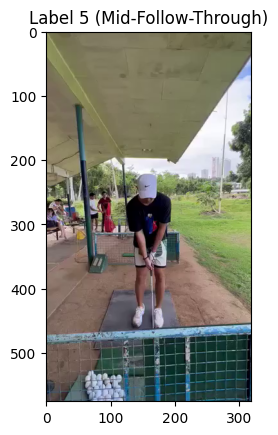

In [56]:
import cv2

ctr = 0

# Define the path to the video file
video_path = './2.mp4'

# Load the video file
cap = cv2.VideoCapture(video_path)

# Initialize dictionary to store highest confidence level frame for each predicted label
highest_conf_frames = {}

# Initialize counter for number of frames with "Mid-Follow-Through" label
follow_through_count = 0

# Define the order in which to display labels
label_order = [1, 2, 3, 4, 5]

while cap.isOpened():
    # Read in the frame
    ret, frame = cap.read()

    if not ret:
        break

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Resize the frame to the desired input size
    input_image = cv2.resize(frame, (input_size, input_size))
    # Expand the dimensions of the image to create a batch of size 1
    input_image = tf.expand_dims(input_image, axis=0)

    # Run the model on the input image to get the keypoints and scores
    keypoint_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    keypoints_with_scores = movenet(input_image, keypoint_indices)
    extract_angle = extract_angles(input_image, keypoint_indices)


    test_scaled_value = scaler.transform(extract_angle)
    test_probabilities = clf1.predict_proba(test_scaled_value)
    test_prediction = np.argmax(test_probabilities)
    test_confidence = test_probabilities[0][test_prediction] * 100
    test_prediction += 1  # add 1 to test_prediction
    label_name = {
        1: "Address",
        2: "Impact",
        3: "Mid-Backswing",
        4: "Mid-Downswing",
        5: "Mid-Follow-Through"
    }[test_prediction]
    print(f"Predicted label: {label_name}, confidence: {test_confidence:.2f}%")
    # print(extract_angle)

    
    

    # Draw the keypoints and scores on the image
    annotated_image = frame.copy()
    output_overlay = draw_prediction_on_image(frame, keypoints_with_scores)

    # Check if current frame has highest confidence level for predicted label
    if test_prediction not in highest_conf_frames or test_confidence > highest_conf_frames[test_prediction][0]:
        # Update dictionary with current frame as new highest confidence level frame
        highest_conf_frames[test_prediction] = (test_confidence, annotated_image)

    # Increment counter for "Mid-Follow-Through" label frames
    if test_prediction == 5:
        follow_through_count += 1

        # # Stop displaying "Mid-Follow-Through" label frames after 20 frames have been displayed
        # if follow_through_count > 20:
        #     break
    # Display the image with the keypoints and scores
    cv2.imshow('output_overlay', output_overlay)
    
    # Stop displaying "Mid-Follow-Through" label frames after 20 frames have been displayed
    if follow_through_count > 20:
        break

    # Wait for a key press and check if the 'q' key was pressed to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()

# Display the highest confidence level frames for each predicted label
for label in label_order:
    if label in highest_conf_frames:
        (confidence, frame) = highest_conf_frames[label]
        label_name = {
            1: "Address",
            2: "Impact",
            3: "Mid-Backswing",
            4: "Mid-Downswing",
            5: "Mid-Follow-Through"
        }[label]
        print(f"Label {label} ({label_name}) has highest confidence level of {confidence:.2f}%")
        plt.imshow(frame)
        plt.title(f"Label {label} ({label_name})")
        plt.show()

Label 1 (Address) has highest confidence level of 99.08%


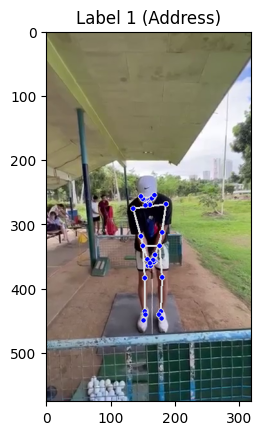

Label 2 (Impact) has highest confidence level of 66.12%


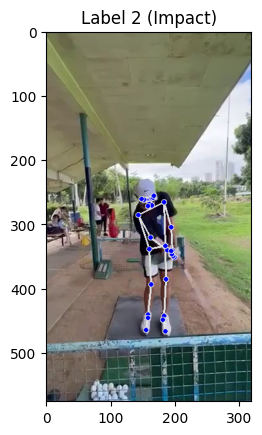

Label 3 (Mid-Backswing) has highest confidence level of 57.22%


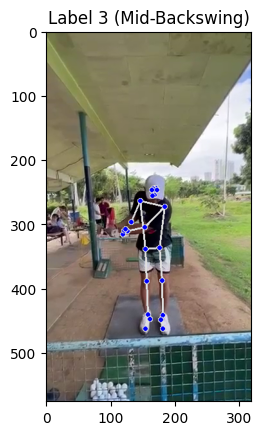

Label 4 (Mid-Downswing) has highest confidence level of 79.63%


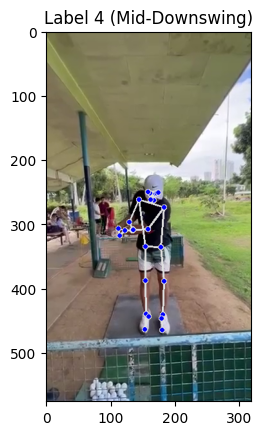

Label 5 (Mid-Follow-Through) has highest confidence level of 99.00%


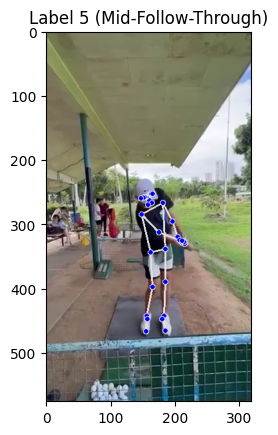

In [27]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Set up Mediapipe Pose
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Set minimum confidence levels
min_detection_confidence = 0.5
min_tracking_confidence = 0.5

# Define the path to the video file
video_file = '2.mp4'

# Open the video file
cap = cv2.VideoCapture(video_file)

# Initialize dictionary to store highest confidence level frame for each predicted label
highest_conf_frames = {}

# Initialize counter for number of frames with "Mid-Follow-Through" label
follow_through_count = 0

# Define the order in which to display labels
label_order = [1, 2, 3, 4, 5]

# Loop over each frame of the video
while cap.isOpened():
    # Read in the frame
    ret, frame = cap.read()

    if not ret:
        break

    # Convert the frame to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect the pose
    with mp_pose.Pose(min_detection_confidence=min_detection_confidence,
                      min_tracking_confidence=min_tracking_confidence) as pose:
        results = pose.process(frame)
        test_value = extract_angles_test(results)
        # print(test_value)
        test_scaled_value = scaler.transform(test_value)
        test_probabilities = clf.predict_proba(test_scaled_value)
        test_prediction = np.argmax(test_probabilities)
        test_confidence = test_probabilities[0][test_prediction] * 100
        test_prediction += 1  # add 1 to test_prediction
        label_name = {
            1: "Address",
            2: "Impact",
            3: "Mid-Backswing",
            4: "Mid-Downswing",
            5: "Mid-Follow-Through"
        }[test_prediction]
        # print(f"Predicted label: {label_name}, confidence: {test_confidence:.2f}%")

        # Check if pose_landmarks attribute is not found or does not contain all expected landmarks
        if not results.pose_landmarks or len(results.pose_landmarks.landmark) != 33:
            continue

        # Draw the pose landmarks on the image
        annotated_image = frame.copy()
        mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Check if current frame has highest confidence level for predicted label
        if test_prediction not in highest_conf_frames or test_confidence > highest_conf_frames[test_prediction][0]:
            # Update dictionary with current frame as new highest confidence level frame
            highest_conf_frames[test_prediction] = (test_confidence, annotated_image)

        # Increment counter for "Mid-Follow-Through" label frames
        if test_prediction == 5:
            follow_through_count += 1

            # Stop displaying "Mid-Follow-Through" label frames after 20 frames have been displayed
            if follow_through_count > 20:
                break

    # Display the annotated image
    cv2.imshow('Pose Detection', annotated_image)

    # Exit the loop when the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close the window
cap.release()
cv2.destroyAllWindows()
# Display the highest confidence level frames for each predicted label
for label in label_order:
    if label in highest_conf_frames:
        (confidence, frame) = highest_conf_frames[label]
        label_name = {
            1: "Address",
            2: "Impact",
            3: "Mid-Backswing",
            4: "Mid-Downswing",
            5: "Mid-Follow-Through"
        }[label]
        print(f"Label {label} ({label_name}) has highest confidence level of {confidence:.2f}%")
        plt.imshow(frame)
        plt.title(f"Label {label} ({label_name})")
        plt.show()

In [ ]:

def draw_pose_lines(frame, pose_frames):
    # Define the colors for drawing the lines and points
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]

    # Define the connections between the body parts for drawing lines
    connections = [(0, 1), (1, 2), (2, 3), (3, 4), (1, 5), (5, 6), (6, 7), (1, 8), (8, 9), (9, 10), (10, 11),
                   (8, 12), (12, 13), (13, 14), (14, 15), (0, 16), (16, 17), (17, 18), (18, 19), (0, 15), (15, 22),
                   (22, 23), (23, 24), (0, 19), (19, 20), (20, 21)]

    # Iterate over the connections and draw the lines
    for connection in connections:
        start = pose_frames[connection[0]]
        end = pose_frames[connection[1]]
        cv2.line(frame, (int(start[0]), int(start[1])), (int(end[0]), int(end[1])), colors[0], 3)

    # Iterate over the pose frames and draw the points
    for pose_frame in pose_frames:
        cv2.circle(frame, (int(pose_frame[0]), int(pose_frame[1])), 5, colors[1], -1)

In [51]:
import cv2
import os


ctr = 0
# Define the path to the video file
video_path = '0.mp4'

# Load the video file
cap = cv2.VideoCapture(video_path)

# Initialize dictionary to store highest confidence level frame for each predicted label
highest_conf_frames = {}

# Initialize counter for number of frames with "Mid-Follow-Through" label
follow_through_count = 0

# Define the order in which to display labels
label_order = [1, 2, 3, 4, 5]

# Load the model
net = cv2.dnn.readNetFromTensorflow('graph_opt.pb')

# Define input and output sizes for the network
inWidth = 368
inHeight = 368

while cap.isOpened():
    # Read in the next frame of the video
    ret, frame = cap.read()

    if not ret:
        break
    # Get the pose frames for the image
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pose_frames = poseFrames(frame)
    LElbowAngle = calculate_angles_movenet(pose_frames[8], pose_frames[7], pose_frames[6])
    RElbowAngle = calculate_angles_movenet(pose_frames[5], pose_frames[4], pose_frames[3]) 
    LShoulderAngle = calculate_angles_movenet(pose_frames[7], pose_frames[6], pose_frames[12]) 
    RShoulderAngle = calculate_angles_movenet(pose_frames[4], pose_frames[3], pose_frames[9]) 
    LHipsAngle = calculate_angles_movenet(pose_frames[6], pose_frames[12], pose_frames[13]) 
    RHipsAngle = calculate_angles_movenet(pose_frames[3], pose_frames[9], pose_frames[10]) 
    LKneeAngle = calculate_angles_movenet(pose_frames[12], pose_frames[13], pose_frames[14]) 
    RKneeAngle = calculate_angles_movenet(pose_frames[9], pose_frames[10], pose_frames[11])

    
    extract_angle = [[LElbowAngle, RElbowAngle, LShoulderAngle, RShoulderAngle, LHipsAngle, RHipsAngle, LKneeAngle, RKneeAngle]]
    print(extract_angle)
    test_scaled_value = scaler.transform(extract_angle)
    test_probabilities = clf2.predict_proba(test_scaled_value)
    test_prediction = np.argmax(test_probabilities)
    test_confidence = test_probabilities[0][test_prediction] * 100
    test_prediction += 1  # add 1 to test_prediction
    label_name = {
        1: "Address",
        2: "Impact",
        3: "Mid-Backswing",
        4: "Mid-Downswing",
        5: "Mid-Follow-Through"
    }[test_prediction]
    print(f"Predicted label: {label_name}, confidence: {test_confidence:.2f}%")

    # Draw the keypoints and scores on the image
    annotated_image = frame.copy()
    output_overlay = draw_prediction_on_image(frame, keypoints_with_scores)

    # Check if current frame has highest confidence level for predicted label
    if test_prediction not in highest_conf_frames or test_confidence > highest_conf_frames[test_prediction][0]:
        # Update dictionary with current frame as new highest confidence level frame
        highest_conf_frames[test_prediction] = (test_confidence, annotated_image)

    # Increment counter for "Mid-Follow-Through" label frames
    if test_prediction == 5:
        follow_through_count += 1

        # # Stop displaying "Mid-Follow-Through" label frames after 20 frames have been displayed
        # if follow_through_count > 20:
        #     break
    # Display the image with the keypoints and scores
    cv2.imshow('output_overlay', output_overlay)
    
    # Stop displaying "Mid-Follow-Through" label frames after 20 frames have been displayed
    if follow_through_count > 20:
        break

    # Wait for a key press and check if the 'q' key was pressed to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    # print(LElbowAngle)
    # print(RElbowAngle)
    # print(LShoulderAngle)
    # print(RShoulderAngle)
    # print(LHipsAngle)
    # print(RHipsAngle)
    # print(LKneeAngle)
    # print(RKneeAngle)


    #  # Draw lines connecting the landmark points to form the pose
    # cv2.line(frame, pose_frames[1], pose_frames[2], (0, 255, 255), 2)  # Neck to RShoulder
    # cv2.line(frame, pose_frames[1], pose_frames[5], (0, 255, 255), 2)  # Neck to LShoulder
    # cv2.line(frame, pose_frames[2], pose_frames[3], (0, 255, 255), 2)  # RShoulder to RElbow
    # cv2.line(frame, pose_frames[3], pose_frames[4], (0, 255, 255), 2)  # RElbow to RWrist
    # cv2.line(frame, pose_frames[5], pose_frames[6], (0, 255, 255), 2)  # LShoulder to LElbow
    # cv2.line(frame, pose_frames[6], pose_frames[7], (0, 255, 255), 2)  # LElbow to LWrist
    # cv2.line(frame, pose_frames[1], pose_frames[8], (0, 255, 255), 2)  # Neck to MidHip
    # cv2.line(frame, pose_frames[8], pose_frames[9], (0, 255, 255), 2)  # MidHip to RHip
    # cv2.line(frame, pose_frames[9], pose_frames[10], (0, 255, 255), 2)  # RHip to RKnee
    # cv2.line(frame, pose_frames[10], pose_frames[11], (0, 255, 255), 2)  # RKnee to RAnkle
    # cv2.line(frame, pose_frames[8], pose_frames[12], (0, 255, 255), 2)  # MidHip to LHip
    # cv2.line(frame, pose_frames[12], pose_frames[13], (0, 255, 255), 2)  # LHip to LKnee
    # cv2.line(frame, pose_frames[13], pose_frames[14], (0, 255, 255), 2)  # LKnee to LAnkle

    # if (LElbowAngle is None or RElbowAngle is None or LShoulderAngle is None or
    #     RShoulderAngle is None or LHipsAngle is None or RHipsAngle is None or
    #     LKneeAngle is None or RKneeAngle is None):
    #     print("Skipped - some angles are null.")
    # else:
    #     golfdataset = pd.DataFrame([[LElbowAngle, RElbowAngle, LShoulderAngle, RShoulderAngle, LHipsAngle, RHipsAngle, LKneeAngle, RKneeAngle, 5]], columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', "Label"])
    #     golfdataset.to_csv('GolfOpenPoseData.csv', mode='a', index=False, header=False)
    

cv2.destroyAllWindows()

[[68.19859051364818, 60.210426216402105, 9.46232220802561, 29.744881296942214, 178.66778014613035, 161.565051177078, 4.5942533312663905, 13.266480846583711]]
Predicted label: Mid-Backswing, confidence: 31.58%
[[73.30075576600639, 50.906141113770495, 11.309932474020208, 32.47119229084849, 176.82016988013575, 157.61986494804043, 4.5942533312663905, 9.321294617546148]]
Predicted label: Mid-Backswing, confidence: 35.31%
[[73.30075576600639, 60.210426216402105, 11.309932474020208, 29.744881296942214, 176.82016988013575, 157.61986494804043, 4.5942533312663905, 5.517135978988058]]
Predicted label: Mid-Backswing, confidence: 35.31%
[[73.30075576600639, 60.210426216402105, 13.2405199151872, 29.744881296942214, 173.8844964337146, 157.61986494804043, 5.5993393365205755, 5.517135978988058]]
Predicted label: Mid-Backswing, confidence: 35.31%
[[73.30075576600639, 60.210426216402105, 11.309932474020208, 29.744881296942214, 176.82016988013575, 157.61986494804043, 4.5942533312663905, 5.517135978988058]

In [50]:
import cv2
import os


def draw_pose_lines(frame, pose_frames):
    # Define the colors for drawing the lines and points
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]

    # Define the connections between the body parts for drawing lines
    connections = [(0, 1), (1, 2), (2, 3), (3, 4), (1, 5), (5, 6), (6, 7), (1, 8), (8, 9), (9, 10), (10, 11),
                   (8, 12), (12, 13), (13, 14), (14, 15), (0, 16), (16, 17), (17, 18), (18, 19), (0, 15), (15, 22),
                   (22, 23), (23, 24), (0, 19), (19, 20), (20, 21)]

    # Iterate over the connections and draw the lines
    for connection in connections:
        start = pose_frames[connection[0]]
        end = pose_frames[connection[1]]
        cv2.line(frame, (int(start[0]), int(start[1])), (int(end[0]), int(end[1])), colors[0], 3)

    # Iterate over the pose frames and draw the points
    for pose_frame in pose_frames:
        cv2.circle(frame, (int(pose_frame[0]), int(pose_frame[1])), 5, colors[1], -1)


ctr = 0
# Define the path to the directory containing the images
image_dir = './GolfDB_Dataset/Mid-Follow-Through/'

# Get a list of all the image filenames in the directory
image_filenames = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)
                   if os.path.isfile(os.path.join(image_dir, filename))]

# Sort the filenames in ascending order by their numeric value
image_filenames = sorted(image_filenames, key=lambda x: int(os.path.splitext(os.path.basename(x))[0]))

# Load the model
net = cv2.dnn.readNetFromTensorflow('graph_opt.pb')

# Define input and output sizes for the network
inWidth = 368
inHeight = 368

for filename in image_filenames:
    # Read in the image
    frame = cv2.imread(filename)

    # Get the pose frames for the image
    pose_frames = poseFrames(frame)

    # Calculate the angles from the pose frames
    LElbowAngle = calculate_angles_movenet(pose_frames[8], pose_frames[7], pose_frames[6])
    RElbowAngle = calculate_angles_movenet(pose_frames[5], pose_frames[4], pose_frames[3]) 
    LShoulderAngle = calculate_angles_movenet(pose_frames[7], pose_frames[6], pose_frames[12]) 
    RShoulderAngle = calculate_angles_movenet(pose_frames[4], pose_frames[3], pose_frames[9]) 
    LHipsAngle = calculate_angles_movenet(pose_frames[6], pose_frames[12], pose_frames[13]) 
    RHipsAngle = calculate_angles_movenet(pose_frames[3], pose_frames[9], pose_frames[10]) 
    LKneeAngle = calculate_angles_movenet(pose_frames[12], pose_frames[13], pose_frames[14]) 
    RKneeAngle = calculate_angles_movenet(pose_frames[9], pose_frames[10], pose_frames[11])

    extract_angle = [[LElbowAngle, RElbowAngle, LShoulderAngle, RShoulderAngle, LHipsAngle, RHipsAngle, LKneeAngle, RKneeAngle]]
    test_scaled_value = scaler.transform(extract_angle)
    test_probabilities = clf2.predict_proba(test_scaled_value)
    test_prediction = np.argmax(test_probabilities)
    test_confidence = test_probabilities[0][test_prediction] * 100
    print(f"Predicted label: {label_name}, confidence: {test_confidence:.2f}%")
    # Display the image with the pose frames
    cv2.imshow('image', frame)

    
    # Wait for a key to be pressed
    key = cv2.waitKey(0) & 0xFF

    # Check if 'q' was pressed to quit the loop
    if key == ord('q'):
        break

    ctr += 1
    if ctr >= 450:
        break

cv2.destroyAllWindows()


Predicted label: Mid-Backswing, confidence: 100.00%
